## Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [15,8]

In [4]:
train = pd.read_csv('train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test = pd.read_csv('test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
# Check the shape and size of the data
train.shape, test.shape

((8523, 12), (5681, 11))

In [9]:
# check the info of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
train.head()
# 0s in Item Visibility

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
combined = pd.concat([train, test], ignore_index = True)
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Base Model

In [15]:
# Regression Problem -  Average
# Classification Problem - Bydefault 0

solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        'Outlet_Identifier':test.Outlet_Identifier,
                        'Item_Outlet_Sales':train.Item_Outlet_Sales.mean()})

In [16]:
# Export the csv outside

solution.to_csv('Basemodel.csv', index = False)  # 1773.8251377790564

In [17]:
cd

C:\Users\Shantanu


# Eda - Univariate Analysis

In [13]:
num = combined.select_dtypes(include = np.number)
num.head(1)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.3,0.016047,249.8092,1999,3735.138


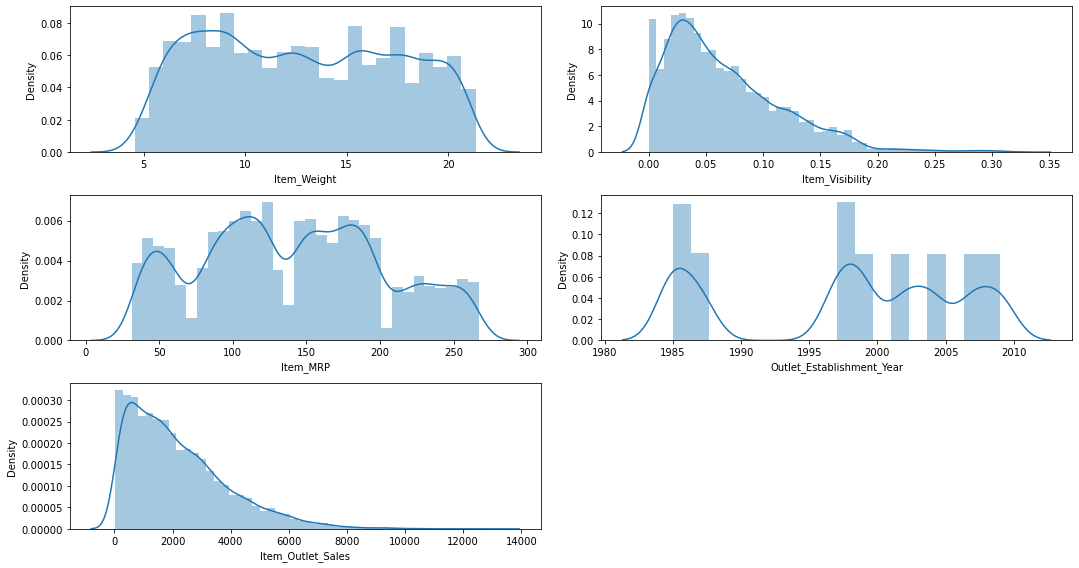

In [19]:
a  = 3
b = 2
c = 1

for i in num.columns:
    plt.subplot(a,b,c)
    sns.distplot(combined.loc[:,i])
    c =  c + 1
    
plt.tight_layout()
plt.show()

### Inference:

1. Item Outlet Sales is +vely skewed in nature. Of course, it is possible because there will be some people/customers who will be buying lot of items and hence the shape will be skewed.

2. Item MRP is multimodel in nature and same is verified by looking in the data.

3. Item Visibility is also skewed however, it starts from 0 because there are lots of entries which have 0s.. It means that the product has 0 visibility i.e. That product doesnot exist however, the sales is intact. This is an anomaly.

4. Item weight is uniform in nature.

In [50]:
cat = combined.select_dtypes(include = np.object).columns

In [27]:
# Lets fix the Item fat content
combined.Item_Fat_Content.replace(to_replace = ['low fat', 'LF', 'reg'],
                                 value = ['Low Fat', 'Low Fat', 'Regular'], inplace = True)

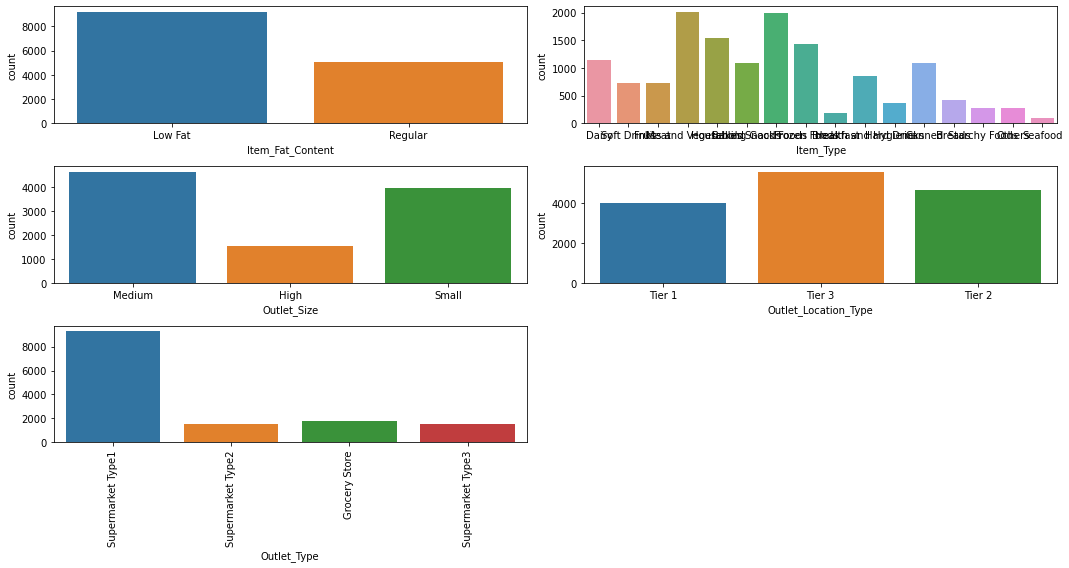

In [28]:
cat = ['Item_Fat_Content', 'Item_Type',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


a  = 3
b = 2
c = 1

for i in cat:
    plt.subplot(a,b,c)
    sns.countplot(combined.loc[:,i])
    plt.xlabel(i)
    c =  c + 1
    
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [36]:
combined.Outlet_Type.value_counts()/len(combined)*100

Supermarket Type1    65.432273
Grocery Store        12.707688
Supermarket Type3    10.975781
Supermarket Type2    10.884258
Name: Outlet_Type, dtype: float64

<AxesSubplot:>

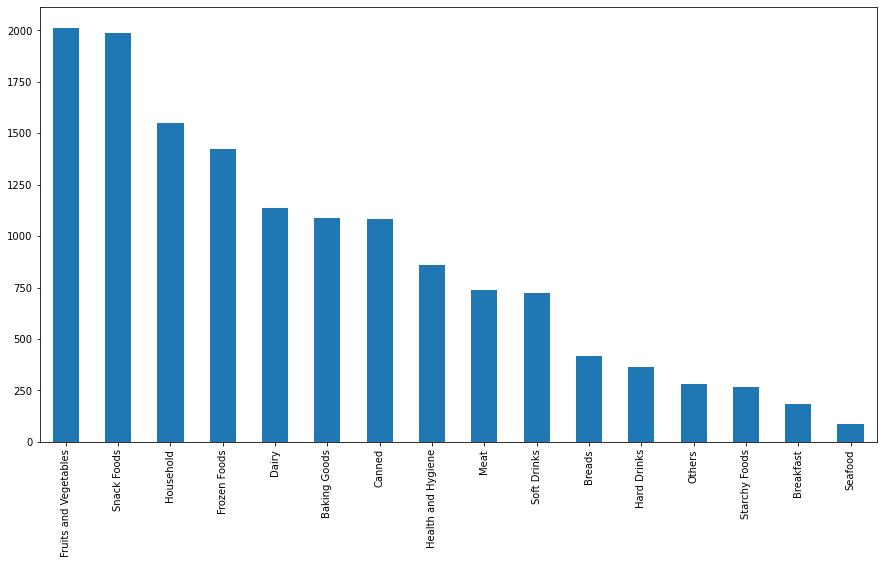

In [37]:
# Top 5 selling Items - Frozen Food, Dairy, Fruits & veggies, household, Snacks
combined.Item_Type.value_counts().plot(kind = 'bar')

In [40]:
# Outlet ID
combined.Outlet_Identifier.value_counts()
# Outlet 27 is the highest performing outlet...

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

<AxesSubplot:>

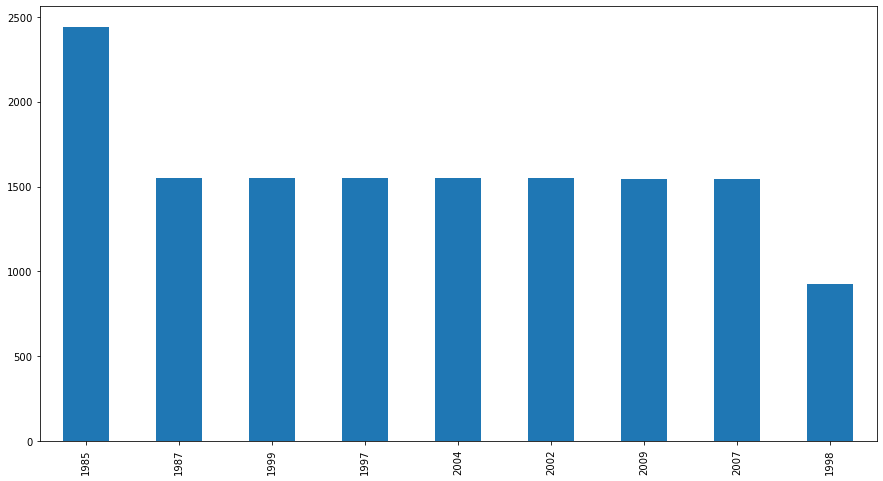

In [38]:
# Outlet Est Year
combined.Outlet_Establishment_Year.value_counts().plot(kind = 'bar')
# Most of the outlets were created in 1985

Suggestion - Establishment Year if 2013 would have not be given to us, then we would have ended with lot of categories. Then you could have tried **Frequency Encoding**...

In [39]:
# Frequency Encoding
combined.Outlet_Establishment_Year.value_counts()/14204

1985    0.171712
1987    0.109335
1999    0.109124
1997    0.109124
2004    0.109124
2002    0.108983
2009    0.108843
2007    0.108631
1998    0.065123
Name: Outlet_Establishment_Year, dtype: float64

### Inferences:

* Most of the items are either **low fat** or **Regular** in nature.
* Top 5 selling items are **Fruits n Veggies, Household, Dairy, Snacks followed by Frozen Foods**
* Most visible outlet is **OUT027**
* **S1** is the most popular supermarket type
* Most of the outlet are based out of **Tier3** cities followed by Tier2 and Tier 1
* MOst of the Outlets are **Medium Size Outlets**

In [43]:
# Descriptive statistics of the Numerical variation..

num.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Bivariate Analysis

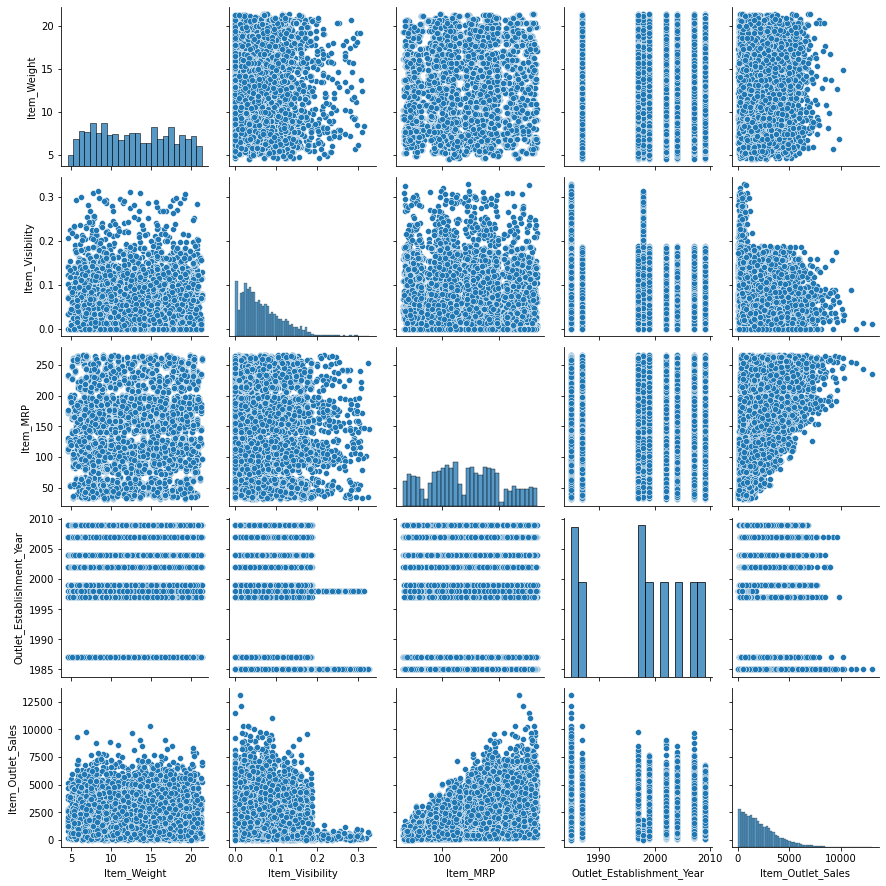

In [45]:
# num vs num
sns.pairplot(num)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

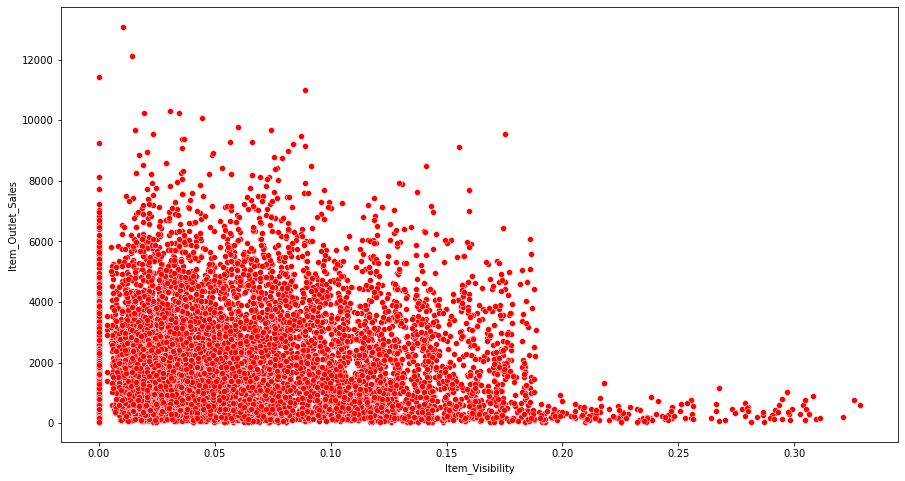

In [47]:
# Visibility vs Sales

sns.scatterplot(combined.Item_Visibility, combined.Item_Outlet_Sales, color = 'red')
# Lot of Sales is captured where the visibility is 0...

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

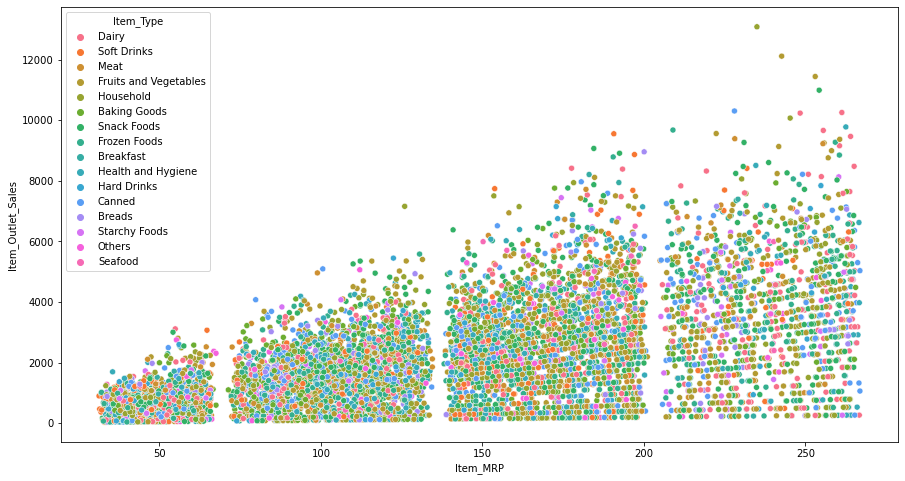

In [49]:
sns.scatterplot(combined.Item_MRP, combined.Item_Outlet_Sales, color = 'red', 
               hue = combined.Item_Type)
# 4 different clusters emerging in the data..

In [52]:
cat

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

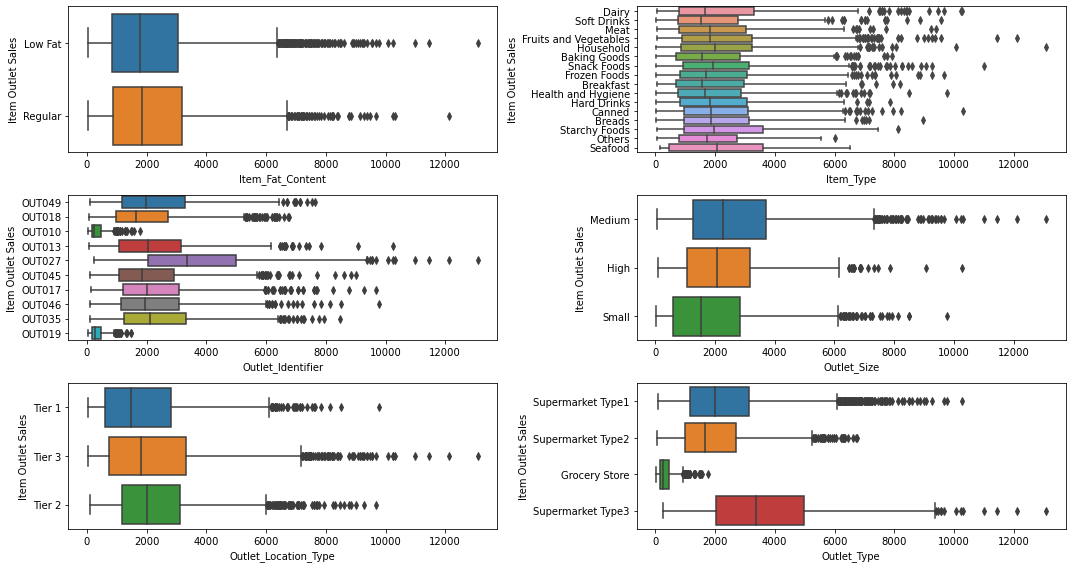

In [56]:
# cat vs num...
cat = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

a = 3
b = 2
c = 1

for i in cat:
    plt.subplot(a,b,c)
    sns.boxplot(y = combined.loc[:,i], x = combined.Item_Outlet_Sales)
    plt.xlabel(i)
    plt.ylabel('Item Outlet Sales')
    c = c + 1
    
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

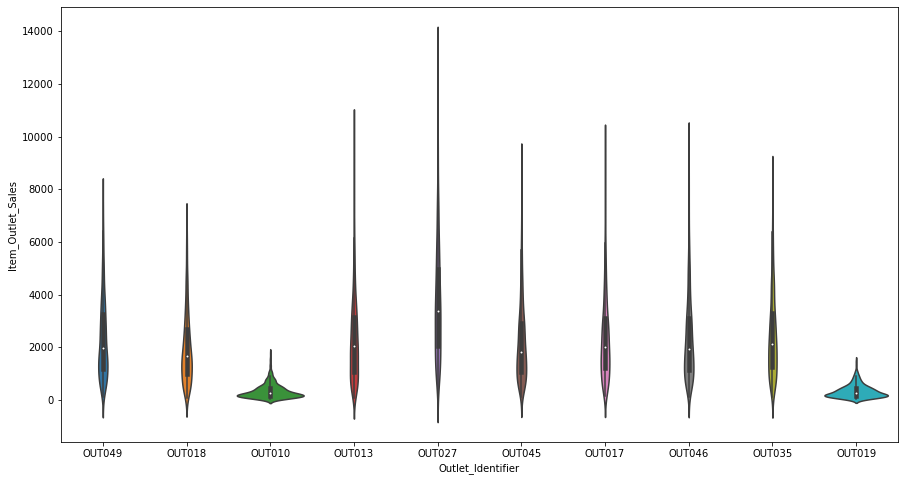

In [57]:
# plot the outlet ID

sns.violinplot(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', data = combined)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

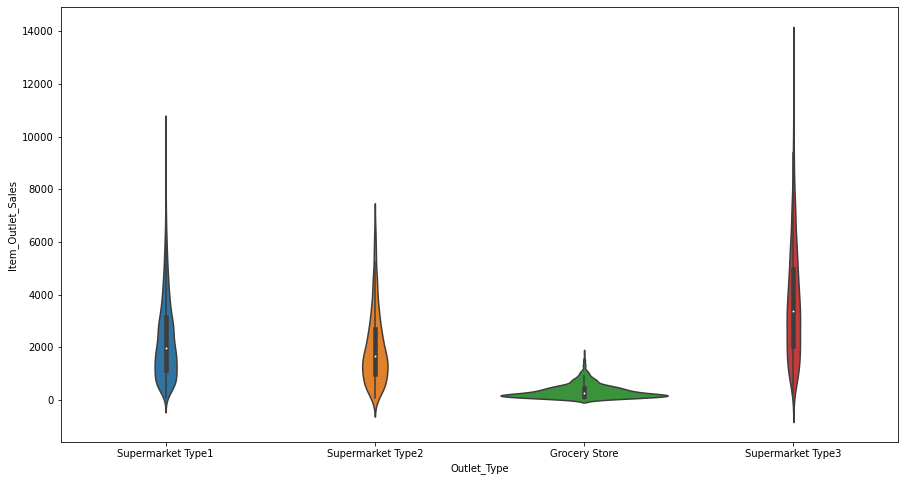

In [58]:
sns.violinplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', data = combined)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

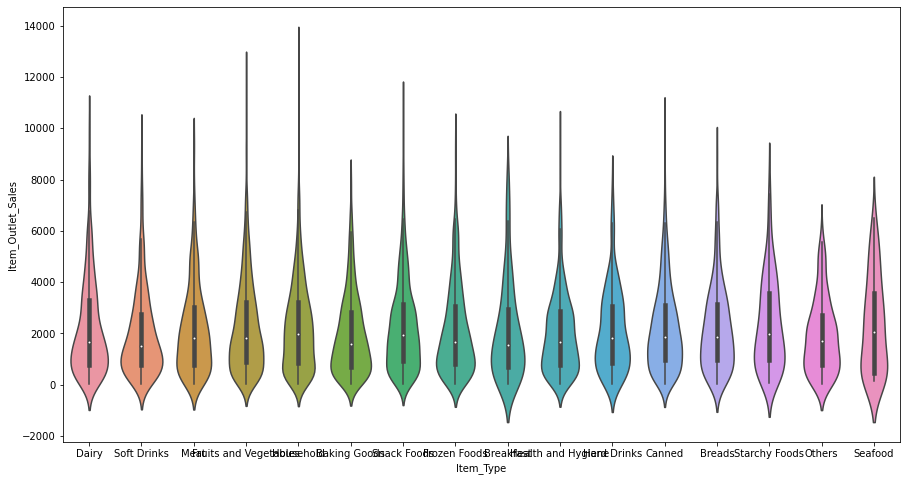

In [59]:
sns.violinplot(x = 'Item_Type', y = 'Item_Outlet_Sales', data = combined)

In [60]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [61]:
combined.Item_Weight.describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [66]:
combined.loc[combined.Item_Weight.isnull(),].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [67]:
copy = combined.dropna()

In [68]:
import scipy.stats as stats

In [75]:
stats.ttest_ind(copy.Item_Weight, copy.Item_MRP)

Ttest_indResult(statistic=-140.33365155871434, pvalue=0.0)

In [76]:
copy.loc[:,['Item_Weight','Item_MRP']].corr()

,Item_Weight,Item_MRP
Item_Weight,1.00000,0.03333
Item_MRP,0.03333,1.00000


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_MRP'>

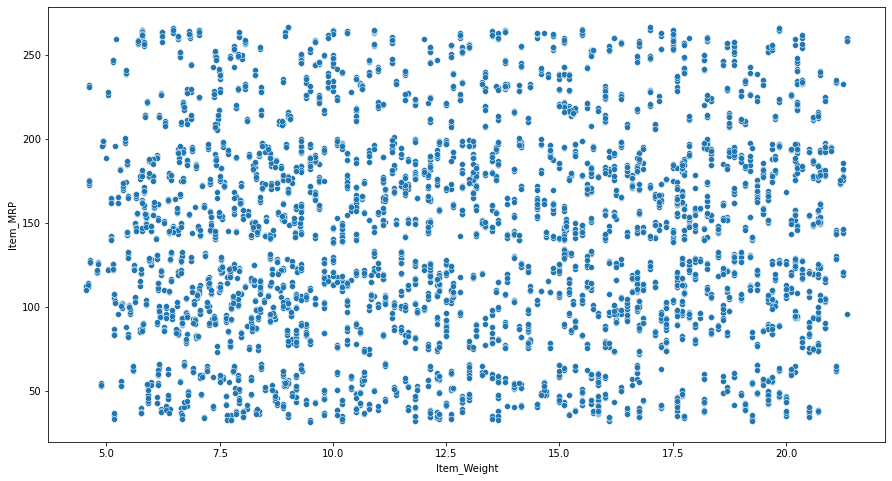

In [71]:
sns.scatterplot(copy.Item_Weight, copy.Item_MRP)

In [78]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [79]:
combined.loc[combined.Item_Weight.isnull(),].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [89]:
# Item_Identifier
combined.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [81]:
combined.loc[combined.Item_Identifier == 'DRI11', 'Item_Weight']

18        NaN
1366      NaN
3127     8.26
5310     8.26
7022     8.26
7192     8.26
8483     8.26
10246    8.26
10674    8.26
12022    8.26
Name: Item_Weight, dtype: float64

In [94]:
# Dictionary Base Approach

dict_wt = np.round(combined.groupby('Item_Identifier')['Item_Weight'].mean(),2).to_dict()

In [95]:
combined['Item_Weight'] = combined.Item_Identifier.map(dict_wt)

In [ ]:
# # loop approach

# for i in combined[combined['Item_Weight'].isnull()].index:
#     j =combined.loc[i,'Item_Identifier']
#     for k in combined[combined['Item_Identifier']==j['Item_Weight'].mode():
#       combined.loc[i,'Item_Weight']=k

In [97]:
# Item Visibility 

combined['Item_Visibility'] = combined.groupby('Item_Identifier')['Item_Visibility'].apply(lambda x: x.replace(to_replace = 0,
                                                                               value = x.median()))

In [100]:
# Replace Item Visibility 0s with Fruits & Veggies Visibility
combined.loc[combined.Item_Type == 'Fruits and Vegetables', 'Item_Visibility'].median()

0.058279823

In [101]:
combined.Item_Visibility.replace(to_replace = 0, value =0.058279823, inplace = True )

In [102]:
combined.loc[combined.Item_Visibility==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [104]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [106]:
combined.loc[combined.Outlet_Size.isnull(),].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.92,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

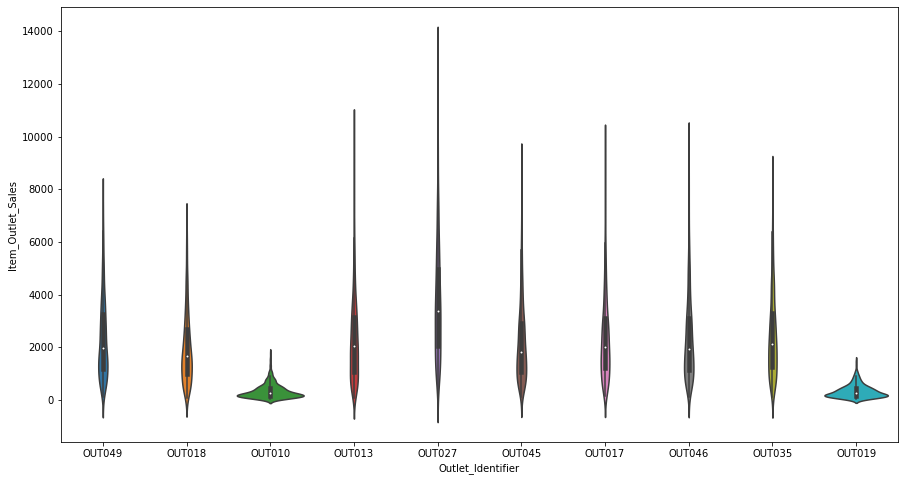

In [108]:
sns.violinplot(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', data = combined)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

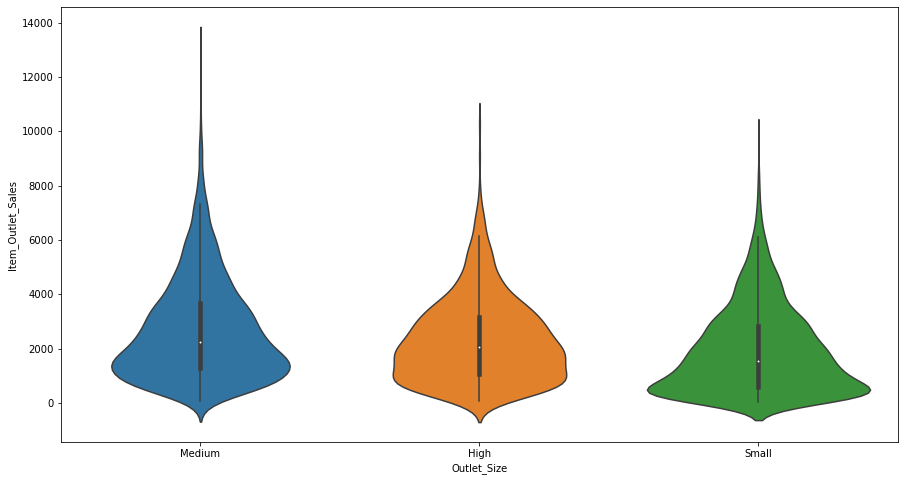

In [109]:
sns.violinplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = combined)

In [110]:
# Filling samll where outlet 10 and outlet 19 appear to have same data distribution..
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [115]:
# Small in Out010
combined.loc[combined.Outlet_Identifier == 'OUT010', 'Outlet_Size'] = 'Small'

In [116]:
# Check the Numerical Analysis...
combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
OUT017,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
OUT018,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648
OUT035,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
OUT045,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
OUT046,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362


In [117]:
# Desc Stats of Sales basis outlet type
combined.groupby('Outlet_Size')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Size,,,,,,,,
High,932.0,2298.995256,1533.531664,73.2380,1072.6038,2050.6640,3166.37835,10256.6490
Medium,2793.0,2681.603542,1855.210528,69.2432,1270.3464,2251.0698,3691.19520,13086.9648
Small,2943.0,1615.546167,1556.928329,33.2900,362.5281,1090.5804,2463.46000,9779.9362


In [118]:
# Outlet Location & Outlet Type ~ Outlet Size

combined.loc[combined.Outlet_Size.isnull(),['Outlet_Type','Outlet_Location_Type']].value_counts()

Outlet_Type        Outlet_Location_Type
Supermarket Type1  Tier 2                  3091
dtype: int64

In [121]:
# S1 and Tier2
combined.loc[(combined.Outlet_Type == 'Supermarket Type1') & 
            (combined.Outlet_Location_Type == 'Tier 2'),'Outlet_Size'].unique()

array([nan, 'Small'], dtype=object)

In [122]:
# Outlet ID ~ Grocery or something else....
combined.loc[combined.Outlet_Identifier == 'OUT017', 'Outlet_Type'].value_counts()

Supermarket Type1    1543
Name: Outlet_Type, dtype: int64

In [124]:
combined.loc[combined.Outlet_Type=='Supermarket Type1','Outlet_Size'].value_counts()

Small     3100
High      1553
Medium    1550
Name: Outlet_Size, dtype: int64

In [125]:
combined.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           880
                      Supermarket Type1  Medium         1550
                                         Small          1550
Tier 2                Supermarket Type1  Small          1550
Tier 3                Grocery Store      Small           925
                      Supermarket Type1  High           1553
                      Supermarket Type2  Medium         1546
                      Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [126]:
# Outlet 45 ~ High

combined.loc[combined.Outlet_Identifier == 'OUT045','Outlet_Size'] = 'High'

In [127]:
# Imputting small in outlet 17
combined.loc[combined.Outlet_Identifier == 'OUT017','Outlet_Size'] = 'Small'

In [128]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# Feature Engineering

In [134]:
ids = []
for i in combined.Item_Identifier:
    combined.Item_Identifier[0][:2]
    ids.append(i[:2])

In [136]:
combined['Item_Ids'] = pd.Series(ids)

In [141]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Non Edible,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [140]:
# Non Edible
combined.loc[combined.Item_Ids == 'NC', 'Item_Fat_Content'] = 'Non Edible'

In [144]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [145]:
# Bin this Data....Perishable and Non Perishable

perishables = ['Dairy', 'Meat', 'Fruits and Vegetables',
       'Breakfast','Breads','Seafood']

In [146]:
def perish(x):
    if x in perishables:
        return('Perishable')
    else:
        return('Non_Perishable')

In [148]:
combined['ItemType_Cat'] = combined.Item_Type.apply(perish)

In [157]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,ItemType_Cat,Outlet_Freq,Outlet_Vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,0.109124,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishable,0.108843,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,0.109124,14
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Perishable,0.065123,15
4,NCD19,8.93,Non Edible,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishable,0.109335,26


In [159]:
249.8092/9.30

26.86120430107527

In [152]:
# Outlet ID - fRequency Encoding
freq = combined.Outlet_Identifier.value_counts()/14204
combined['Outlet_Freq'] = combined.Outlet_Identifier.map(freq)

In [156]:
# Vintage
combined['Outlet_Vintage'] = 2013 - combined.Outlet_Establishment_Year

In [161]:
combined["Sales"]= combined.Item_Weight*combined.Item_MRP

In [163]:
# Drop the VARIABLE

final = combined.drop(['Item_Identifier','Item_Type','Outlet_Identifier',
                       'Outlet_Establishment_Year'], axis = 1)
final.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,ItemType_Cat,Outlet_Freq,Outlet_Vintage,Sales
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,0.109124,14,2323.225560
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishable,0.108843,4,285.753664
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,0.109124,14,2478.315000
3,19.20,Regular,0.022914,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,Perishable,0.065123,15,3496.224000
4,8.93,Non Edible,0.013177,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishable,0.109335,26,480.982302


In [164]:
final.shape

(14204, 13)

## Statistical Tests

In [166]:
# New Sales created has some impact on TGT

# Ho: That the new sales column created has no effect on Target
# Ha: That it has effect on Target

stats.ttest_ind(final.Sales.dropna(), final.Item_Outlet_Sales.dropna())
# new sales column created is significant...

Ttest_indResult(statistic=-19.795883788031716, pvalue=1.7311495983303393e-86)

In [167]:
# If vintage is significant
stats.ttest_ind(final.Outlet_Vintage.dropna(), final.Item_Outlet_Sales.dropna())
# Outlet_Vintage column created is significant...

Ttest_indResult(statistic=-151.27920299384095, pvalue=0.0)

In [168]:
# If Outlet_freq is significant
stats.ttest_ind(final.Outlet_Freq.dropna(), final.Item_Outlet_Sales.dropna())
# Outlet_Freq

Ttest_indResult(statistic=-152.33444860527277, pvalue=0.0)

In [170]:
# Encoding the data in dummies..
final['Outlet_Size'] = final.Outlet_Size.map({'Small':1,'Medium':2,'High':3})

In [174]:
dummydata = pd.get_dummies(final, drop_first = True)
dummydata.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Outlet_Freq,Outlet_Vintage,Sales,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Ids_FD,Item_Ids_NC,ItemType_Cat_Perishable
0,9.30,0.016047,249.8092,2,3735.1380,0.109124,14,2323.225560,0,0,0,0,1,0,0,1,0,1
1,5.92,0.019278,48.2692,2,443.4228,0.108843,4,285.753664,0,1,0,1,0,1,0,0,0,0
2,17.50,0.016760,141.6180,2,2097.2700,0.109124,14,2478.315000,0,0,0,0,1,0,0,1,0,1
3,19.20,0.022914,182.0950,1,732.3800,0.065123,15,3496.224000,0,1,0,1,0,0,0,1,0,1
4,8.93,0.013177,53.8614,3,994.7052,0.109335,26,480.982302,1,0,0,1,1,0,0,0,1,0


In [175]:
# Split the Data in Train and Test

newtrain = dummydata.loc[0:train.shape[0]-1,]
newtest = dummydata.loc[train.shape[0]:,]

In [179]:
# Drop the tgt sales

newtest = newtest.drop('Item_Outlet_Sales', axis = 1)

In [181]:
newtrain.shape, newtest.shape

((8523, 18), (5681, 17))

# Model Building

* Linear Regression
* Decision Tree
* Random Forest
* Adaboost
* Gradient Boosting

In [183]:
X = newtrain.drop('Item_Outlet_Sales', axis = 1)
y = newtrain['Item_Outlet_Sales']

In [184]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

pred_lr = lr.fit(X,y).predict(newtest)

In [185]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        'Outlet_Identifier':test.Outlet_Identifier,
                        'Item_Outlet_Sales':np.abs(pred_lr)})

solution.to_csv('LRmodel.csv', index = False)   #1192.1103021807835

In [191]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

rf = RandomForestRegressor()
ada = AdaBoostRegressor()
gbm = GradientBoostingRegressor()

pred_rf = rf.fit(X,y).predict(newtest)
pred_ada = ada.fit(X,y).predict(newtest)
pred_gbm = gbm.fit(X,y).predict(newtest)

solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        'Outlet_Identifier':test.Outlet_Identifier,
                        'Item_Outlet_Sales':np.abs(pred_rf)})

solution.to_csv('RF1model.csv', index = False)

In [192]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        'Outlet_Identifier':test.Outlet_Identifier,
                        'Item_Outlet_Sales':np.abs(pred_ada)})

solution.to_csv('ada1model.csv', index = False)

In [193]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        'Outlet_Identifier':test.Outlet_Identifier,
                        'Item_Outlet_Sales':np.abs(pred_gbm)})

solution.to_csv('gbm1model.csv', index = False)  # 1153.670269979974

In [196]:
# Light GBM
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()

pred_lgbm = gbm.fit(X,y).predict(newtest)

solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        'Outlet_Identifier':test.Outlet_Identifier,
                        'Item_Outlet_Sales':np.abs(pred_lgbm)})

solution.to_csv('lgbmmodel.csv', index = False)

## Final Model on GBM

* Cross Validated Model
* Hyper Parameter Tuned Model

In [208]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 10, shuffle = True)
gbm = GradientBoostingRegressor()
pred_gbm = pd.DataFrame()

n = 10
for i in range(n):
    folds = next(kfold.split(X))  # split the data in even groups
    xtrain = X.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    # print(xtrain.shape, ytrain.shape)
    pred_gbm[i] = gbm.fit(xtrain,ytrain).predict(newtest)

In [209]:
gbm_cv = pred_gbm.mean(axis = 1)

In [210]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        'Outlet_Identifier':test.Outlet_Identifier,
                        'Item_Outlet_Sales':np.abs(gbm_cv)})

solution.to_csv('GBM_10cv.csv', index = False)  #1151.2987362011766

In [211]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 10, shuffle = True)
lgbm = LGBMRegressor()
pred_lgbm = pd.DataFrame()

n = 10
for i in range(n):
    folds = next(kfold.split(X))  # split the data in even groups
    xtrain = X.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    # print(xtrain.shape, ytrain.shape)
    pred_gbm[i] = lgbm.fit(xtrain,ytrain).predict(newtest)

In [212]:
lgbm_cv = pred_gbm.mean(axis = 1)

In [213]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        'Outlet_Identifier':test.Outlet_Identifier,
                        'Item_Outlet_Sales':np.abs(lgbm_cv)})

solution.to_csv('LGBM_10cv.csv', index = False) 

In [ ]:
# Tune the Paramters of the GBM 

from sklearn.model_selection import GridSearchCV

gbm = GradientBoostingRegressor()

params = {'loss':['squared_error', 'absolute_error','huber','quantile'],
         'learning_rate':[0.1,0.2,0.01,0.25,0.3,0.5],
         'criterion':['friedman_mse','squared_error','mse'],
         'max_depth':[4,5,6,7,8]}

In [ ]:
search = GridSearchCV(estimator = gbm, param_grid = params, cv = 10)

search.fit(X,y)

print(search.best_params_)

In [222]:
# Tuned Model

kfold = KFold(n_splits=10, shuffle = True)

tunedgbm = GradientBoostingRegressor(loss = 'absolute_error', learning_rate =0.1 , criterion ='squared_error' , max_depth =4 )

#lgbm = LGBMRegressor()
pred_gbm = pd.DataFrame()

n = 50
for i in range(n):
    folds = next(kfold.split(X)) # Split the Data in even groups
    xtrain = X.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    #print(xtrain.shape, ytrain.shape)
    pred_gbm[i] = tunedgbm.fit(xtrain, ytrain).predict(newtest)

In [223]:
gbm_50cv = pred_gbm.mean(axis = 1)

In [224]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        'Outlet_Identifier':test.Outlet_Identifier,
                        'Item_Outlet_Sales':np.abs(gbm_50cv)})

solution.to_csv('GBM_50cv.csv', index = False)   #1156.57752095355

# Indicidual parameters

In [214]:
from sklearn.model_selection import GridSearchCV

gbm = GradientBoostingRegressor()

params = {'loss':['squared_error', 'absolute_error','huber','quantile']}

In [215]:
search = GridSearchCV(estimator = gbm, param_grid = params, cv = 10)

search.fit(X,y)

print(search.best_params_)

{'loss': 'absolute_error'}


In [216]:
from sklearn.model_selection import GridSearchCV

gbm = GradientBoostingRegressor()

params = {'learning_rate':[0.1,0.2,0.01,0.25,0.3,0.5]}

In [217]:
search = GridSearchCV(estimator = gbm, param_grid = params, cv = 10)

search.fit(X,y)

print(search.best_params_)

{'learning_rate': 0.1}


In [218]:
from sklearn.model_selection import GridSearchCV

gbm = GradientBoostingRegressor()

params = {'criterion':['friedman_mse','squared_error','mse']}

In [219]:
search = GridSearchCV(estimator = gbm, param_grid = params, cv = 10)

search.fit(X,y)

print(search.best_params_)

{'criterion': 'squared_error'}


In [220]:
from sklearn.model_selection import GridSearchCV

gbm = GradientBoostingRegressor()

params = {'max_depth':[4,5,6,7,8]}

In [221]:
search = GridSearchCV(estimator = gbm, param_grid = params, cv = 10)

search.fit(X,y)

print(search.best_params_)

{'max_depth': 4}


## Summary of Model

* **GBM with KFold CV appears to be the best model giving 1151 RMSE**